# Imports

In [1]:
%%capture
!pip install sumy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import nltk
import plotly
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import ibm_db
import ibm_db_dbi
from sumy.utils import get_stop_words
import string
from collections import Counter
import math

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Setting up SQL/Python Environment

In [4]:
# @hidden_cell
dsn_hostname = "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "qgs98802"  
dsn_pwd = "f20uBnloVxeaSeZK"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"

dsn_port = "32733"
dsn_protocol = "TCPIP"  

dsn_security = "SSL"

In [5]:
# Formatting dsn in order to make connection
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd, dsn_security)

In [6]:
%%capture
#Connecting to Database
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

In [7]:
pconn = ibm_db_dbi.Connection(conn)

# Data Retrieval and Wrangling

In [8]:
overall_week1 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_data_week_1'''
overall_week1_df = pd.read_sql(overall_week1, pconn)

overall_week2 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_data_week_2'''
overall_week2_df = pd.read_sql(overall_week2, pconn)

overall_week3 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_data_week_2'''
overall_week3_df = pd.read_sql(overall_week2, pconn)

overall_week3 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_data_week_3'''
overall_week3_df = pd.read_sql(overall_week3, pconn)

overall_week4 = f'''SELECT political_alignment, news_sources_type, content, cleaned_tweets, length_of_tweet, day_of_week,
NULLIF(overall_sentiment, 0.0000) AS overall_sentiment, NULLIF (subjectivity, 0.000) AS subjectivity, named_entities,
named_sentiment from nlp_twitter_table_week_4_'''
overall_week4_df = pd.read_sql(overall_week4, pconn)

overall_df = pd.concat([overall_week1_df, overall_week2_df, overall_week3_df, overall_week4_df], axis=0, ignore_index=True)

In [9]:
#Separating the data by the variables being tested
politician_df =overall_df[overall_df['NEWS_SOURCES_TYPE']=='Politician'] 
traditional_df = overall_df[overall_df['NEWS_SOURCES_TYPE']=='Traditional'] 
alternative_df = overall_df[overall_df['NEWS_SOURCES_TYPE']=='Alternative']

# Introduction

In [10]:
mean_sentiment_week1 = "SELECT news_sources_type, CAST(AVG(overall_sentiment)as DECIMAL (4,3))\
as average_sentiment from (SELECT tweet_id,political_alignment, news_sources_type,\
length_of_tweet, day_of_week, NULLIF (overall_sentiment, 0.0000) AS overall_sentiment, \
NULLIF (subjectivity, 0.000) as subjectivity from nlp_twitter_data_week_1 \
 WHERE length_of_tweet >= 10)\
GROUP BY news_sources_type"
mean_sentiment_week1_df = pd.read_sql(mean_sentiment_week1, pconn)

mean_sentiment_week2 = "SELECT news_sources_type, CAST(AVG(overall_sentiment)as DECIMAL (4,3)) as average_sentiment from (SELECT tweet_id,political_alignment, news_sources_type,\
length_of_tweet, day_of_week, NULLIF (overall_sentiment, 0.0000) AS overall_sentiment,NULLIF (subjectivity, 0.000) as subjectivity from nlp_twitter_data_week_2\
 WHERE length_of_tweet >= 10)\
GROUP BY news_sources_type"
mean_sentiment_week2_df = pd.read_sql(mean_sentiment_week2, pconn)

mean_sentiment_week3 ="SELECT news_sources_type, CAST(AVG(overall_sentiment)as DECIMAL (4,3)) as average_sentiment from (SELECT tweet_id,political_alignment, news_sources_type,\
length_of_tweet, day_of_week, NULLIF (overall_sentiment, 0.0000) AS overall_sentiment,NULLIF (subjectivity, 0.000) as subjectivity from nlp_twitter_data_week_3\
 WHERE length_of_tweet >= 10)\
GROUP BY news_sources_type"
mean_sentiment_week3_df = pd.read_sql(mean_sentiment_week3, pconn)

mean_sentiment_week4 = "SELECT news_sources_type, CAST(AVG(overall_sentiment)as DECIMAL (4,3)) as average_sentiment from (SELECT tweet_id,political_alignment, news_sources_type,\
length_of_tweet, day_of_week, NULLIF (overall_sentiment, 0.0000) AS overall_sentiment,NULLIF (subjectivity, 0.000) as subjectivity from nlp_twitter_table_week_4_\
 WHERE length_of_tweet >= 10)\
GROUP BY news_sources_type"
mean_sentiment_week4_df = pd.read_sql(mean_sentiment_week4, pconn)

display(mean_sentiment_week1_df)
display(mean_sentiment_week2_df)
display(mean_sentiment_week3_df)
display(mean_sentiment_week4_df)

,NEWS_SOURCES_TYPE,AVERAGE_SENTIMENT
0,Alternative,-0.097
1,Politician,0.274
2,Traditional,-0.077


,NEWS_SOURCES_TYPE,AVERAGE_SENTIMENT
0,Alternative,-0.115
1,Politician,0.211
2,Traditional,-0.054


,NEWS_SOURCES_TYPE,AVERAGE_SENTIMENT
0,Alternative,-0.145
1,Politician,0.168
2,Traditional,-0.084


,NEWS_SOURCES_TYPE,AVERAGE_SENTIMENT
0,Alternative,-0.078
1,Politician,0.180
2,Traditional,-0.062


I started this project with the intention of determining what factors can used used to identify different types of new media outlets. It started with the lengthy process of data collection and preprocessing. Every week, in the month of November I extracted over 6,000 tweets from some of the leading news media outlets in the United States. Then, after extraction and preprocessing, I ran each weeks' data through pre-organized notebooks I made to extract important statistical information and visualizations. This acted as a form of simplified EDA to help guide me on my analysis. It made finding patterns and correlations a lot easier. The dataframes presented above shed light on one of the most important patterns found.

To preface the introduction of this pattern, the variables need be expanded upon a bit. The data was separated into three identifying parts in order analyze any inherent differences. The classifications of these subsections of the data are Traditional news, Alternative news, and Politicians. Traditional news refers to large, popular news media outlets with great name recognition. The assumption is that they follow certain journalistic conventions. Alternative news refers to lesser known media outlets that are generally independantly owned and deviate away from those traditional journalistic conventions. And politicians, they refer most directly to popular political figures. 

The dataframes present the average sentiment scores of the media types for each week of November. There is a consistency in their scores, especially regarding their relative scores to each other. Alternative media is the most negative; politicians' tweets are the most positive; and the traditional's average always lie between the two, though leaning much closer to alternative media. Their absolute scores don't change too much either as none of their score range much more 0.1. This prompted me to analzye the sets a bit further to identify if there are any statistically significant differences and whether these differences can be explained by contents of the tweets in each set.

# Statistical Analysis

The first step is statistically analyzing the data. This goes beyond just finding the mean. Important distribution statistics of each media type (such as standard deviation, 25th/75th percentile, min/max values) are calculated. Then the distribution of sentiments are visualized by smoothed histogram plots to help get a rudimentary understanding of the data.

From there, I would have used hypothesis testing to compare the distributions. It would have  found out whether, at a particular significance level, there were major differences between the media types. This, however, will have to wait. Since the distributions aren;t rendered as a normal curves, I transform them. I randomly sampled from each media type hundreds of times, each time collecting the mean of the sample. Using the means collected,  I found the distribution of the sampling means of each dataset. I then used those distributions for the hypothesis tests.

### Distribution Analysis

In [11]:
#Setting up the dataframe of Distribution Statistics
media_type_df = [politician_df, traditional_df, alternative_df]
media_type = ['Politician', 'Traditional', 'Alternative']
media_type_dict = {}
n=0
for df in media_type_df:
    values = np.array(df['OVERALL_SENTIMENT'].values.tolist())
    media_type_dict[media_type[n]] = [round(np.nanmean(values),3), round(np.nanmedian(values),3), 
                                      round(np.nanstd(values),3), round(np.nanpercentile(values, 25),3), 
                                      round(np.nanpercentile(values, 75), 3), np.nanmin(values), np.nanmax(values)]
    n+=1
stat_df = pd.DataFrame(media_type_dict)
stat_df['Statistics'] = ['Mean', 'Median', 'Standard Dev', '25th Percentile', '75th Percentile', 'Min', 'Max']
stat_df.set_index('Statistics', inplace =True)
stat_df

,Politician,Traditional,Alternative
Statistics,,,
Mean,0.2120,-0.0700,-0.1000
Median,0.4220,-0.1280,-0.2260
Standard Dev,0.5920,0.5280,0.5420
25th Percentile,-0.3610,-0.5420,-0.5720
75th Percentile,0.7350,0.4020,0.4020
Min,-0.9723,-0.9757,-0.9764
Max,0.9808,0.9690,0.9551


Text(0.5, 1.0, 'Alternative Sentiment Distribution')

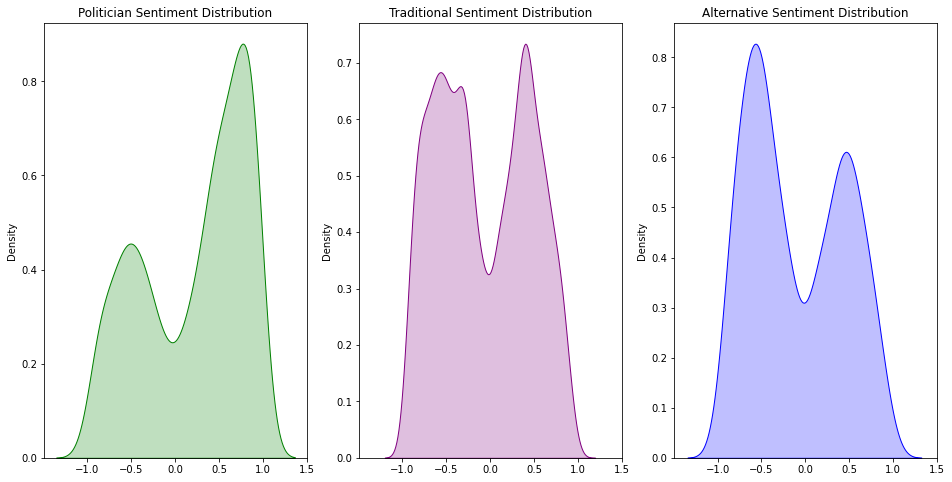

In [12]:
#Prepping data for Histogram
all_values_dict = {}
n=0
for df in media_type_df:
    values = df['OVERALL_SENTIMENT'].values.tolist()
    all_values_dict[media_type[n]] = values
    n+=1
#Histogram
fig,axes = plt.subplots(1,3,sharex=True, figsize=(16,8))
sns.kdeplot(data=all_values_dict['Politician'], color='green', ax=axes[0], fill=True)
sns.kdeplot(data=all_values_dict['Traditional'],color='purple', ax=axes[1], fill=True)
sns.kdeplot(data=all_values_dict['Alternative'], color='blue', ax=axes[2], fill=True)

axes[0].set_title("Politician Sentiment Distribution")
axes[1].set_title('Traditional Sentiment Distribution')
axes[2].set_title('Alternative Sentiment Distribution')
#0.278784
# n = 1000

#### Analysis of Distributions

Quick note: The scores ranges from -1 to 1 with -1 being the most negative, 1 being the most positive score, and 0 being neutral.


The most noticeable detail from the graph is that the variables do not have normal distributions. There appears to be a dip at zero. This may have something to do with how the data needed to be cleaned of '0' values where the NLTK library was unable to assess sentiment. Regarding their statistics, the mean and standard deviation of the data from 'Politician' are the highest, at 0.212 and 0.592, respectively. The histogram seems to represent that too as it holds a lot more values to the right of 0 than to the left. Traditional news seem to be more neutral overall. Its standard deviation is the smallest of the sets at 0.528 and its mean is very close to zero at -0.07. Again, its histogram supports this as the amount of values to the left and right of zero are almost equal. Lastly, there is  Alternative news media. While not too negative overall, its mean is the lowest of all of them at -0.1. It does have more negatively rated tweets than positive, though the difference is not as extreme as that of the politicians' tweets. 

### Hypothesis Testing

This section will be taking the distribution statistics shown earlier, and using what was found to engage in hypothesis testing. Each combination of the media types will be compared. The null hypothesis is that there are no significant differences between the samples, implying that they are only different samples of the same population, while the alternative hypothesis being the opposite, that there are significant differences between the samples and giving proof to the idea that they represent separate populations.

How exactly would this be tested? Well, as these are all samples of tweets collected in the month of November, I decided to have the distribution of differences of sample means be my test statistic. The assumption, as alluded to by the null hypothesis, is that the differences are pratically 0 and I will be testing this at an alpha level of 0.05. As such, the critical region, denoted by the z-score of the distribution of differences of sample means, will start at 1.64. If the test renders a z-score higher than this, then it is safe to reject the null hypothesis and assume that the samples are, in fact, significantly different. 

In [13]:
def get_z_score(values1, values2):
    no_nan1 = []
    for value in values1:
        if value > -2:
            no_nan1.append(value)
            
    no_nan2 = []
    for value in values2:
        if value > -2:
            no_nan2.append(value)
            
    mean1= np.mean(np.array(no_nan1))
    mean2= np.mean(np.array(no_nan2))
    
    std1= np.std(np.array(no_nan1))
    std2= np.std(np.array(no_nan2))
    
    numerator = mean1-mean2
    denominator = math.sqrt((std1**2/len(no_nan1))+(std2**2/len(no_nan2)))
    z_score = numerator/denominator
    return z_score

In [14]:
alternative = np.array(alternative_df['OVERALL_SENTIMENT'].tolist())
traditional = np.array(traditional_df['OVERALL_SENTIMENT'].tolist())
politician = np.array(politician_df['OVERALL_SENTIMENT'].tolist())

In [15]:
#Traditional media vs Alternative media 
get_z_score(traditional, alternative)

2.1805507335228698

In [16]:
#Traditional media vs Politicians
get_z_score(politician, traditional)

20.917279452471668

In [17]:
#Alternative media vs Politicians
get_z_score(politician, alternative)

16.982037110800253

#### Analysis of Z-scores

The z-scores make it clear that there are significant differences between their averages of sentiment. This implies that, from a statistical basis, the media types, and their distributions, are truly distinct from one another. The probability of their differences of means being so high, if in fact they do represent different samples of the same population, is below 5%. The probability of Traditional media and Alternative media representing the same population is only 1.5%, a p-value of 0.015, while the other two combinations have p-values so small that they are not even represented on the normal probablity table. We can reject the null hypothesis on all accounts and accept that it is likely that they are samples are distinct populations. 

### Sampling

I chose to create this section to help visualize what was being tested previously. There is the understanding that the distribution of sampling means should approximate to a normal distribution. What that means is, if you have a population and collect hundreds of samples, the means of those samples show render a normal distribution even if the original distribution is is not normal. The mean of this new normal distribution theorically is the mean of the population from which the samples are being pulled which make them quite important if it is impossible to collect data from the entire population. These normal distributions, the distribution of sampling means, are effectively what were being compared in the hypothesis test, or rather the average difference of the values of the distributions.

Since it would be impossible to perfectly visualize this due to the limitation of the data, a smaller version was created. I sampled from out of the original samples, collected their means, and plotted them on a graph.  The findings of this don't hold as much statistical weight, at least not within the realm of this particular notebook but it will make it a bit easier to understand the test statistic of the previous section and why it is useful. Effectively the original samples play the role of populations, and we can compare them through their sampling means. The more similar they are in shape and placement, the closer their differences reach 0 and the more likely they represent the same population.

#### Functions used in this Section

In [18]:
def random_index(size_index, size_data):
    index_set = set()
    while len(index_set) != size_index:
        random_variable = np.random.randint(size_data)
        index_set.add(random_variable) 
    return index_set

In [19]:
def random_sample_mean(media_type):
    values = all_values_dict[media_type]
    no_nan_values = []
    for value in values:
        if value > -2:
            no_nan_values.append(value)
    index = random_index(100, len(no_nan_values))
    sample_values = []
    for index in index:
        sample_value = no_nan_values[index]
        sample_values.append(sample_value)
    np_sample_values = np.array(sample_values)
    mean = np.mean(np_sample_values)
    return mean

In [20]:
def random_sample(media_type):
    values = all_values_dict[media_type]
    index = random_index(1000, len(values))
    sample_values = []
    for index in index:
        sample_value = values[index]
        sample_values.append(sample_value)
    np_sample_values = np.array(sample_values)
    true_values = []
    for value in np_sample_values:
        if value > -2:
            true_values.append(value)
    return true_values

#### Sampling Mean Distribution

In [21]:
#Collecting the distribution of sample means of each variable
politician_means = []
for i in range (1000):
    politician_sample_mean = random_sample_mean('Politician')
    politician_means.append(politician_sample_mean)

traditional_means = []
for i in range (1000):
    traditional_sample_mean = random_sample_mean('Traditional')
    traditional_means.append(traditional_sample_mean)

alternative_means = []
for i in range (1000):
    alternative_sample_mean = random_sample_mean('Alternative')
    alternative_means.append(alternative_sample_mean)
    

In [22]:
politician_mean = np.mean(np.array(politician_means))
politician_std = np.std(np.array(politician_means))

traditional_mean = np.mean(np.array(traditional_means))
traditional_std = np.std(np.array(traditional_means))

alternative_mean = np.mean(np.array(alternative_means))
alternative_std = np.std(np.array(alternative_means))

print(f'''Politician Sampling Mean and Standard Deviation are ({round(politician_mean,3)}, {round(politician_std,3)}) respectively.
Traditional Sampling Mean and Standard Deviation are ({round(traditional_mean, 3)}, {round(traditional_std,3)}) respectively.
Alternative Sampling Mean and Standard Deviation are ({round(alternative_mean,3)}, {round(alternative_std,3)}) respectively.''')

Politician Sampling Mean and Standard Deviation are (0.214, 0.056) respectively.
Traditional Sampling Mean and Standard Deviation are (-0.07, 0.053) respectively.
Alternative Sampling Mean and Standard Deviation are (-0.1, 0.053) respectively.


Text(0.5, 1.0, 'Sampling Mean Distribution')

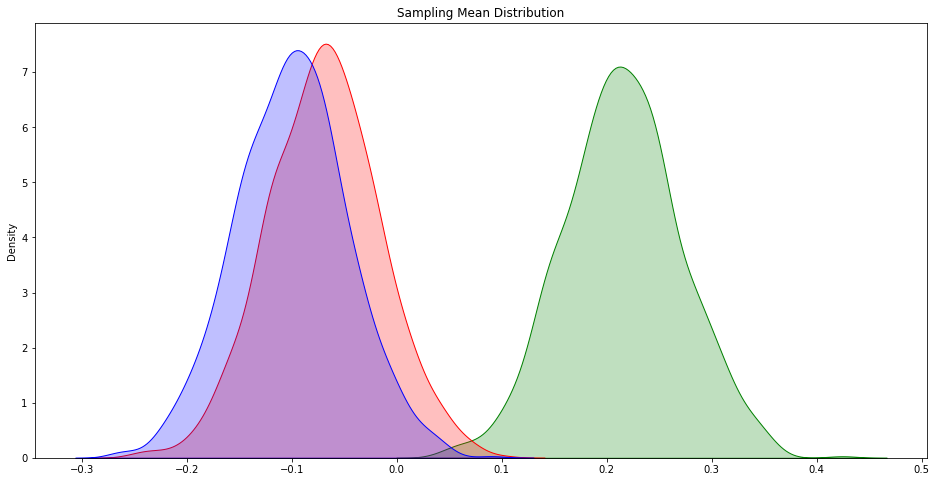

In [23]:
#Histograms
fig,axes = plt.subplots(1,1,sharex=True, sharey=True ,figsize=(16,8))
sns.kdeplot(data=politician_means, color='green', ax=axes, fill=True)
sns.kdeplot(data=traditional_means,color='red', ax=axes, fill=True)
sns.kdeplot(data=alternative_means, color='blue', ax=axes, fill=True)


axes.set_title("Sampling Mean Distribution")

#### Analysis of Distributions

Lets take a look at the distribution statistics first. There is nothing too surprising in that regard. The means are relatively identical to those of the of the prior distributions. The values are very similar and their positions relative to each other stay the same. I can note however that the standard deviations have shrunk considerably. Instead of being between 0.5 and 0.6, their standard deviations now are a tenth of that, hovering at about 0.06. This shrinkage is largly due to the size of samples pulled, approximately 1000 tweets pulled for each sample, and the change in focus of the two distributions, the former focusing on the distribution of sentiment while the latter on the distribution of means of sentiment when sampled. The distribution of sampling means appears to be much more compact and uniform. Much easier to compare.

Looking at the distribution plots, one thing is very clear, the 'Politicians' portion is noticeably different from the other two variables. While there is intersection, it is minimal with the left tail crossing over the right tails of the others. The other distributions, Alternative and Traditional media, are much more similar. They occupy almost the same space, with a bit of deviation in their dispersion of means. To summarize, alternative media and politicians have similar standard deviations, while alternative and traditional media have similar means. Traditional media holds the lowest standard deviation and politicians hold the highest mean. While those two, politicians and traditional media, share no distribution statistic in common, no two distributions share similar means and standard deviations. They seem to be distinct distributions, but in order to tell with statistical certainty if these hold any major differences, we'd need to engage in hypothesis testing. 

## Visualization Tweet Contents

Now that it is understood that the variables are statistically distinct from the standpoint of sentiment, we can now delve into why. Why are the distributions of sentiment distinct? What does their word choice look like? What were the topics most commonly mentioned? And, what percentages of the tweets were positive, negative, or neutral. From here on will be visualizations answering these questions as well as my analysis of the visualizations.   

#### Functions in use for this Section

In [24]:
def clean_data(string_):
    import string
    stopwords = list(get_stop_words('english'))
    string_punctuation = [char for char in string.punctuation]
    string_list = [char for char in string_ if char not in string_punctuation]
    clean_of_punt = ''.join(string_list)
    clean_punct_list = clean_of_punt.split()
    clean_of_stop_words = [word.upper() for word in clean_punct_list if word.lower() not in stopwords]
    return clean_of_stop_words

In [25]:
def bar_comparison_word(title, sub_titles, dfs, num_graph, color=None):
    if num_graph > 1:
        fig, axes = plt.subplots(1,num_graph, sharex=False, figsize=(20,10))
        fig.suptitle(title)
        for i in range (num_graph):
            axes[i].set_title(sub_titles[i])
    for i in range(num_graph):
        all_cleaned_data = []
        for list_ in dfs[i]['CONTENT']:
            string = list_[1:-1]
            cleaned_string = clean_data(string)
            all_cleaned_data.extend(cleaned_string)
        final = Counter(all_cleaned_data)
        new_df = pd.DataFrame(list(final.items()),columns = ['Word','Count']) 
        new_df.sort_values(by='Count', ascending=False, inplace=True)
        sns.set(style="darkgrid")
        if num_graph > 1:
            sns.barplot(x='Count',y='Word',data=new_df.iloc[0:15], color=color, orient= 'h', ax=axes[i])
        else:
            sns.barplot(x='Count',y='Word',data=new_df.iloc[0:15], color=color, orient= 'h')

In [26]:
def bar_comparison_NE(title, sub_titles, dfs, num_graph, color=None):
    if num_graph > 1:
        fig, axes = plt.subplots(1,num_graph, sharex=False, figsize=(20,10))
        fig.suptitle(title)
        for i in range (num_graph):
            axes[i].set_title(sub_titles[i])
    for i in range(num_graph):
        string_punct = [char for char in string.punctuation]
        stopwords = list(get_stop_words('english'))
        all_entities = []
        for list__ in dfs[i]['NAMED_ENTITIES']:
            entities = list__[1:-1]
            char_list = [char for char in entities if char not in string_punct]
            entity_list = ''.join(char_list).split()
            all_entities.extend(entity_list)
        cleaned_entities = [entity.upper() for entity in all_entities if entity.lower() not in stopwords]
        final = Counter(cleaned_entities)
        new_df = pd.DataFrame(list(final.items()),columns = ['Entity','Count']) 
        new_df.sort_values(by='Count', ascending=False, inplace=True)
        sns.set(style="darkgrid")
        if num_graph > 1:
            sns.barplot(x='Count',y='Entity',data=new_df.iloc[0:15], color=color, orient= 'h', ax=axes[i])
        else:
            sns.barplot(x='Count',y='Entity',data=new_df.iloc[0:15], color=color, orient= 'h')

In [27]:
def make_pie_sent(df, attr):
    dict_ = {'Neutral':len(df[df[attr].between(-0.40, 0.45, inclusive=False)]),
             'Negative':len(df[df[attr] <= -0.40]),
             'Positive':len(df[df[attr] >= 0.45])}
    pie_df = pd.DataFrame(list(dict_.items()),columns = ['Sentiment','Count'])
    pie_df.set_index('Sentiment', inplace=True)
    pie_df.plot.pie(autopct="%.1f%%", y='Count')

#### Polarity of Tweets

C:\Users\Jay\AppData\Local\Temp/ipykernel_45816/2948170151.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  dict_ = {'Neutral':len(df[df[attr].between(-0.40, 0.45, inclusive=False)]),


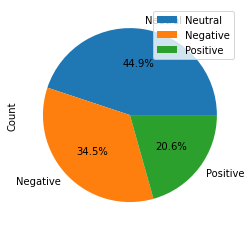

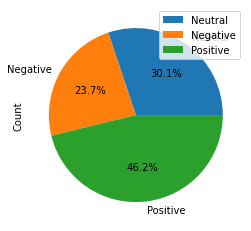

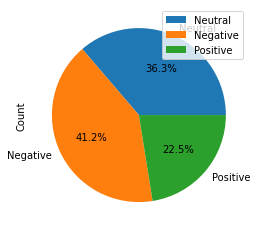

In [28]:
make_pie_sent(traditional_df, 'OVERALL_SENTIMENT') #TRADITIONAL
make_pie_sent(politician_df, 'OVERALL_SENTIMENT') #POLITICIAN
make_pie_sent(alternative_df, 'OVERALL_SENTIMENT') #ALTERNATIVE

#### Analysis of Graphs

The pie charts seem to support the analysis of the distribution of sampling means. The tweets from politicians seem to be the most positive. Almost half of their tweets are considered positive and they have the smallest proportion of negative tweets overall. Traditional media appear only slightly negative with high proportions of neutral tweets, but more negative tweets than positive ones. Alternative media is more comfortably negative as it has the largest proportion of negative tweets but still is composed of a fair amount of neutral tweets. Its smallest proportion is positive tweets. 

#### Topics and Word Choice

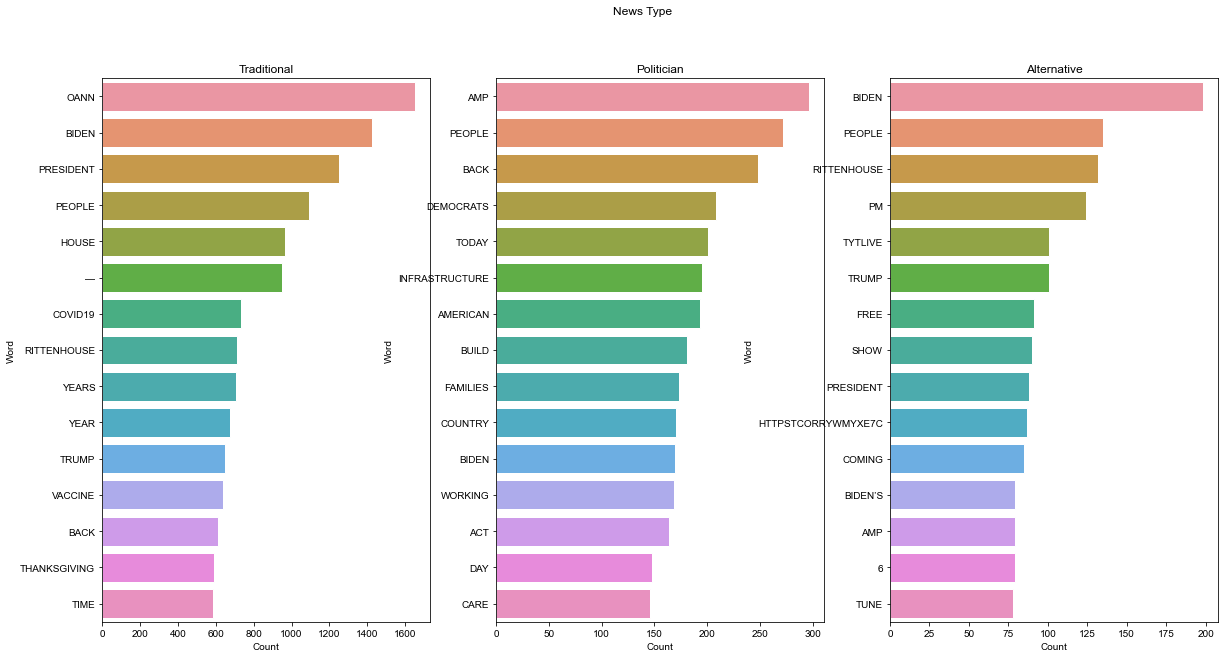

In [29]:
subtitles=['Traditional', 'Politician', 'Alternative']
data= [traditional_df, politician_df, alternative_df]
bar_comparison_word(title='News Type', sub_titles=subtitles, dfs=data, num_graph=3)

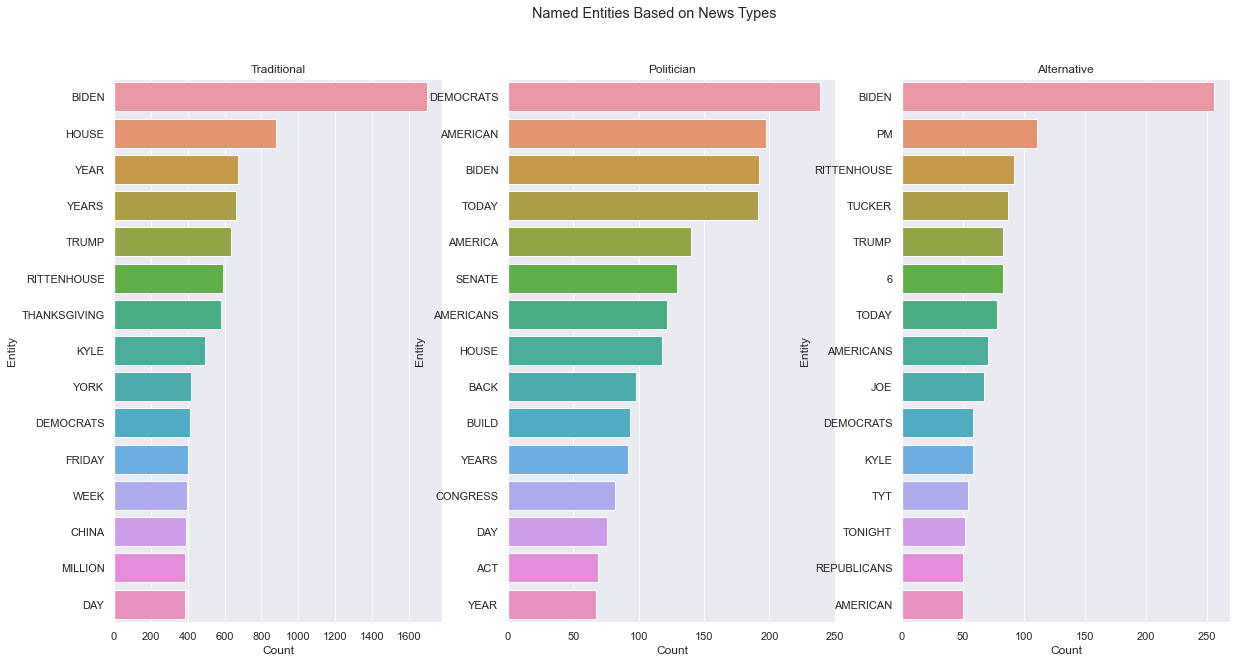

In [30]:
subtitles = ['Traditional', 'Politician', 'Alternative']
data = [traditional_df, politician_df, alternative_df]
bar_comparison_NE(title='Named Entities Based on News Types', sub_titles=subtitles, dfs=data, num_graph=3 )

#### Analysis of Graphs

Joe Biden is referred to quite frequently in all accounts. It is one of the most used words as well as one of the most mentioned persons across media. He is the most referred to entity in Traditional and Alternative media, and by significant margin. He is mentioned at least twice as many times as any other entities. His name remains the top used word by Alternative media and is only beaten by 'OANN', an extreme right-wing media station, in traditional media. Biden, however, is not mentioned as frequently by politicians. 'Biden' only holds 11th place as the most used word and 3rd place as the most mentioned entity. 'American', 'People' and 'Democrats' and words referring to the Build Back Better Plan seem to have more prominence with politicians. 

Politicians also seemed to avoid certain controversial topics that were quite popular in that timeframe. Words and/or entities refering to Kyle Rittenhouse, Donald Trump, and Covid did not not appear very often according the the graphs. The words associated with them are more 'patriotic' and 'political'. They focused on what was going on in congress at the time like the Build Back Better act, disputes in the senate and the house, democrats (ones proposing the Build Back Better act) as well as references to american values like family and the working class. Terms referring specifically to America and its people are probably the most common overall. Even the term 'today' is of the most used in both its graphs.

Alternative media, as stated prior, referred to Biden a lot. He is the most used word and the most mentioned entity. He was quite popular. While they do speak more about controversial topics than the politicians (Rittenhouse, Trump, and Tucker Carlson), they also do quite a bit of self advertisement. Their tweets refer quite a bit to their show times and remind their watcher to tune in. 'Tyt' and 'Tytlive' were of some of the most popular terms/entities. This is actually the name of one the alternative media outlets where tweets were pulled from. In addition to self advertisement, comes terms of patriotism like 'american', 'people', and 'today' though not quite to the same extent as politicians. 

Regarding controversial topics, traditional media seem to refer to them the most. Terms referring to Trump, Biden, Build Back Better, China, Rittenhouse, and the vaccine are quite common. Their verbage is significantly less patriotic and political, and they appear to not engage in self advertisement. Even the mention of political parties seem to not be common place. Democrats and 'people' are only references once, being 10th and 4th in their respective graphes. They are also the only group to speak enough about thankgiving enough to have it show up on any of the graphes. One last interesting thing is the fact the OANN is the most used word. It could come from the fact that OANN, possible competition for a lot the traditional media outlets, was getting a lot of traffic around that time period. That, however is unsure.

All three sets of tweet seem to carry distinct personalities and focuses. Politicians like to focus on patriotism, change, and what specifically is going on in Congress at the time. Alternative and Traditional media focus on a wider breadth of topics, not avoiding what could be considered controversial topics. Traditional media does have an even wider breadth than alternative media as alternative media appear to divert quite a bit of their attention to self advertisement and patriotism. 